In [1]:
import os
import warnings
import pandas as pd
import matplotlib.pyplot as plt

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

from strandtools.annotation import SVAnnotation

In [2]:
PATH_TO_NORMALIZED_DATA = '../resources/BM510x3.txt.normalized.gz'
cwd = os.getcwd()
PATH_TO_STRANDTOOLS = os.path.join(cwd, "../")

In [3]:
counts = pd.read_csv(PATH_TO_NORMALIZED_DATA, index_col=0, compression="gzip")
counts.head()

chrom   start      end   sample            cell          w          c  \
0  chr1       0   200000  BM510x3  BM510x3PE20401  18.806191  12.537461   
1  chr1  200000   400000  BM510x3  BM510x3PE20401   0.000000   0.000000   
2  chr1  400000   600000  BM510x3  BM510x3PE20401   0.000000  26.133269   
3  chr1  600000   800000  BM510x3  BM510x3PE20401  21.920134   2.740017   
4  chr1  800000  1000000  BM510x3  BM510x3PE20401  25.261188   0.000000   

   tot_count class  
0  31.343652    WW  
1   0.000000    WW  
2  26.133269    WW  
3  24.660151    WW  
4  25.261188    WW

## Annotation

To create an SV annotation table, read first the count file.  
Then the class `SVAnnotation`, when initiated, reads chromosomes and cell names from the count file to create an empty annotation table.

In [4]:
ann1 = SVAnnotation(counts)

New annotations can be added providing the following arguments, via abbreviations:  
- cell
- chromosome
- copy number type
- size type
- haplotype

In [5]:
ann1.add('BM510x3PE20403', 'chr2', 'G', 'T', '1')
ann1.add('BM510x3PE20423', 'chr17', 'L', 'T', '2')
ann1.add('BM510x3PE20477', 'chr20', 'G', 'I', '2')
ann1.add('BM510x3PE20406', 'chrX', 'L', 'T', '1')

The complete list of possible entry (which can also be modified) is accessible like this:

In [6]:
ann1._legend

mode            type abbr         color  int
0        copy            gain    G     limegreen    1
1        copy            loss    L        tomato    2
2        copy         complex    C       skyblue    3
3        copy  chromothripsis   CT  mediumorchid    4
4        copy            none    N     gainsboro    0
5        size        terminal    T     limegreen    1
6        size           whole    W        tomato    2
7        size             arm    A       skyblue    3
8        size    interstitial    I  mediumorchid    4
9        size            none    N     gainsboro    0
10  haplotype              H1    1        tomato    1
11  haplotype              H2    2       skyblue    2
12  haplotype            none    N     gainsboro    0

Summary tables and barplots can be easily generated

([{'copy':              copy  frequency
   0            gain   0.030303
   1            loss   0.030303
   0         complex   0.000000
   0  chromothripsis   0.000000},
  {'size':            size  frequency
   0      terminal   0.045455
   1  interstitial   0.015152
   0         whole   0.000000
   0           arm   0.000000},
  {'haplotype':   haplotype  frequency
   0        H1   0.030303
   1        H2   0.030303}],
 [<Figure size 800x500 with 1 Axes>,
  <Figure size 800x500 with 1 Axes>,
  <Figure size 800x500 with 1 Axes>])

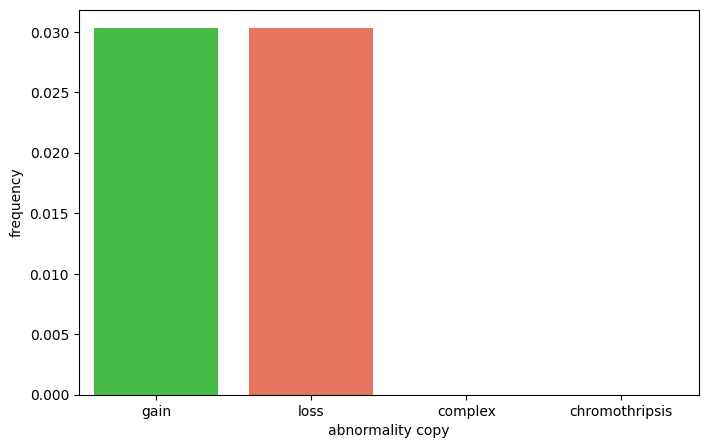

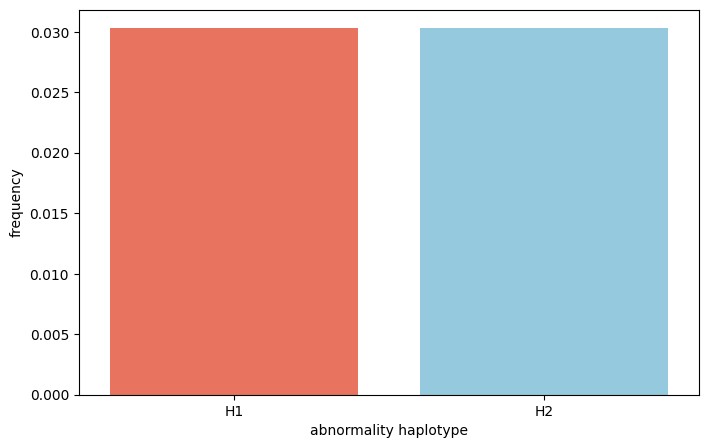

In [7]:
ann1.display(True)
ann1.summary_plots(kind='frequency')

Each mode of the annotation is described in a pandas.DataFrame, the tables are then arranged in a dictionary, with the mode names as keys

In [8]:
ann1.table.keys()

dict_keys(['copy', 'size', 'haplotype'])

In [9]:
ann1.table['copy'].head()

BM510x3PE20401 BM510x3PE20402 BM510x3PE20403 BM510x3PE20406  \
chr1              N              N              N              N   
chr2              N              N              G              N   
chr3              N              N              N              N   
chr4              N              N              N              N   
chr5              N              N              N              N   

     BM510x3PE20407 BM510x3PE20408 BM510x3PE20410 BM510x3PE20411  \
chr1              N              N              N              N   
chr2              N              N              N              N   
chr3              N              N              N              N   
chr4              N              N              N              N   
chr5              N              N              N              N   

     BM510x3PE20414 BM510x3PE20415  ... BM510x3PE20485 BM510x3PE20486  \
chr1              N              N  ...              N              N   
chr2              N              N  ...              N              N   
chr3              N              N  ...              N              N   
chr4              N              N  ...              N              N   
chr5              N              N  ...              N              N   

     BM510x3PE20487 BM510x3PE20488 BM510x3PE20489 BM510x3PE20491  \
chr1              N              N              N              N   
chr2              N              N              N              N   
chr3              N              N              N              N   
chr4              N              N              N              N   
chr5              N              N              N              N   

     BM510x3PE20492 BM510x3PE20493 BM510x3PE20495 BM510x3PE20496  
chr1              N              N              N              N  
chr2              N              N              N              N  
chr3              N              N              N              N  
chr4              N              N              N              N  
chr5              N              N              N              N  

[5 rows x 66 columns]

To continue a previous annotation, save a single tables as csv. Then the tables can be used to reconstruct the dictionary and provide it when creating the SVAnnotation object instead of the count file.

In [10]:
SAVEPATH = os.path.join(PATH_TO_STRANDTOOLS, 'resources','BM510x3.annotation.{}.csv')

# saving tables
for mode in ['copy', 'size', 'haplotype']:
    ann1.table[mode].to_csv(os.path.join(SAVEPATH.format(mode)))

In [11]:
# reloading annotation
ann2 = {mode: pd.read_csv(SAVEPATH.format(mode), index_col=0) for mode in ['copy', 'size', 'haplotype']}

In [12]:
ann2 = SVAnnotation(ann2)

([{'copy':              copy  frequency
   0            gain   0.030303
   1            loss   0.030303
   0         complex   0.000000
   0  chromothripsis   0.000000},
  {'size':            size  frequency
   0      terminal   0.045455
   1  interstitial   0.015152
   0         whole   0.000000
   0           arm   0.000000},
  {'haplotype':   haplotype  frequency
   0        H1   0.030303
   1        H2   0.030303}],
 [<Figure size 800x500 with 1 Axes>,
  <Figure size 800x500 with 1 Axes>,
  <Figure size 800x500 with 1 Axes>])

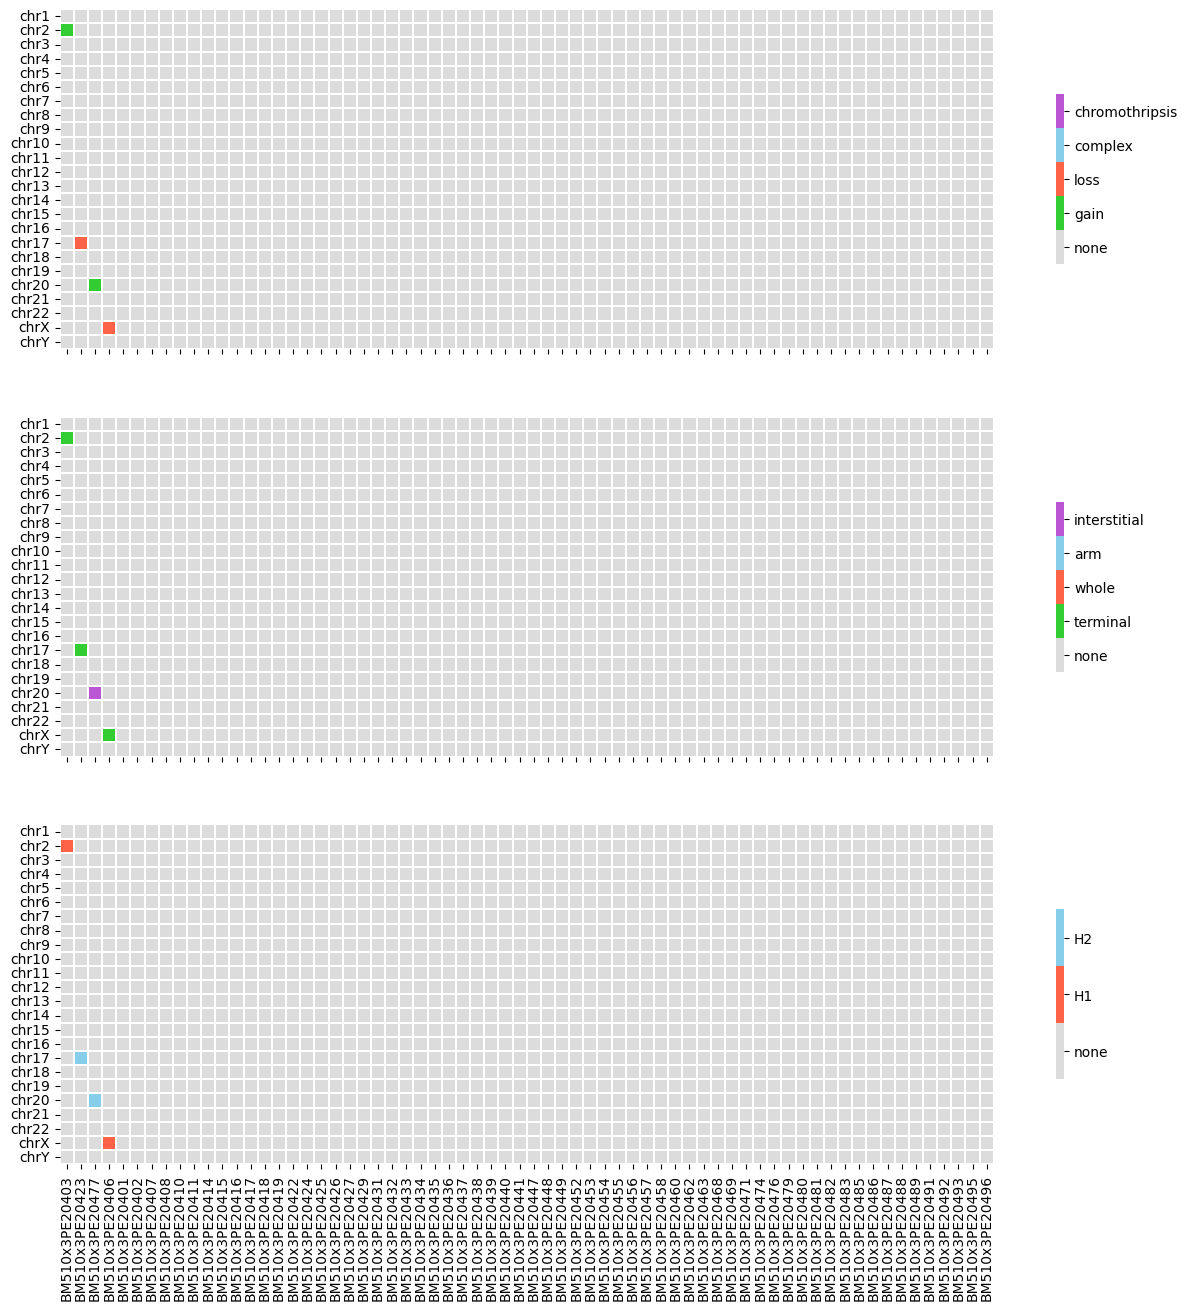

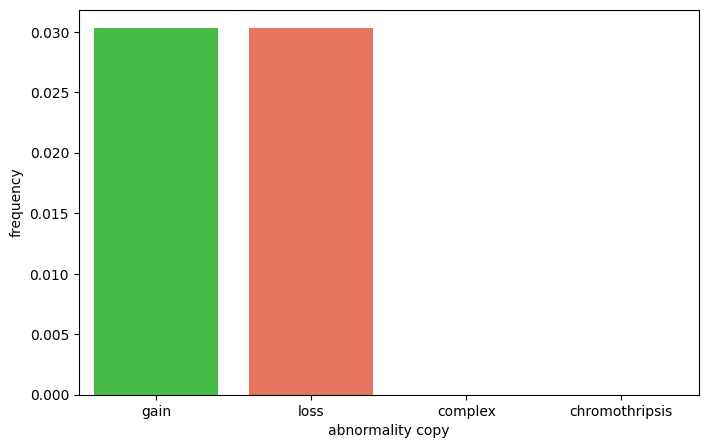

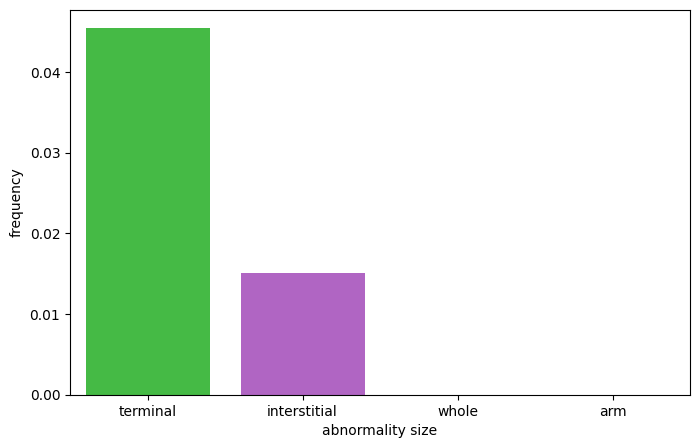

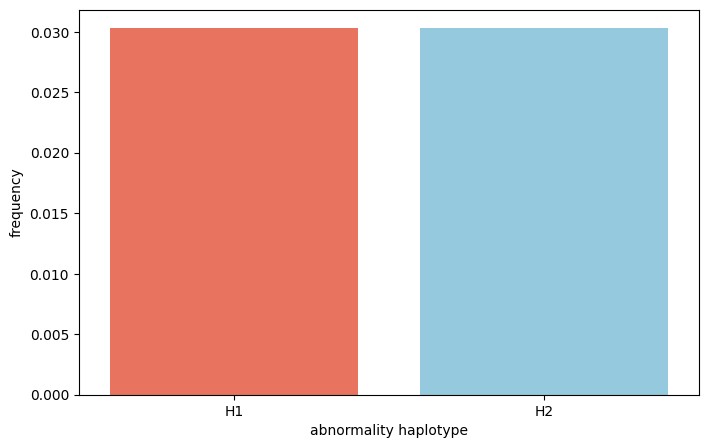

In [13]:
ann2.display(True)
ann2.summary_plots(kind='frequency')